##  Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing
##  an objective function with suitable smoothness properties 
##  (e.g. differentiable or subdifferentiable). It can be regarded as a 
##  stochastic approximation of gradient descent optimization, 
##  since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof
## (calculated from a randomly selected subset of the data). 
## Especially in high-dimensional optimization problems this reduces the very high computational burden, 
## achieving faster iterations in exchange for a lower convergence rate.

In [100]:
from sklearn.datasets import load_diabetes

import numpy as  np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import time

In [6]:
X,y = load_diabetes(return_X_y=True)

In [7]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [8]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 2)

In [9]:
reg = LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

In [10]:
print(reg.coef_)
print()
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]

151.88331005254167


In [11]:
y_pred= reg.predict(X_test)
r2_score(y_test ,y_pred)

0.4399338661568968

In [73]:
class SGDregressor:
    
    # First, we initialize parameters
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None 
        self.learning_rate = learning_rate  # Fix: Use the provided learning_rate parameter
        self.epochs = epochs
    
    # We update the coef and the intercept
    def fit(self, X_train, y_train):
        self.intercept_ = 0 
        self.coef_ = np.ones(X_train.shape[1])
        
        # This is all for the intercept 
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0, X_train.shape[0])
                
                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ -= self.learning_rate * intercept_der  #
                
                coef_der = -2 * (y_train[idx] - y_hat) * X_train[idx]  
                self.coef_ -= self.learning_rate * coef_der  
                
        print(self.coef_, self.intercept_)
            
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_


In [96]:
sgd1 = SGDregressor(epochs=45, learning_rate=0.01)

In [102]:
start = time.time()
sgd1.fit(X_train ,y_train )
print()
print("time taken  is ", time.time() - start )

[  64.94869463  -50.63926717  341.11383237  250.68162966   18.89896385
  -22.95013231 -171.90376257  130.16170014  307.40492842  130.27747354] 142.70442259787276

time taken  is  0.16954588890075684


In [98]:
y_pred = sgd1.predict(X_test)

In [99]:
r2_score(y_test , y_pred)

0.427354311282912

# when to use sgd

## when you have big data

## when you have non-convex function -

# 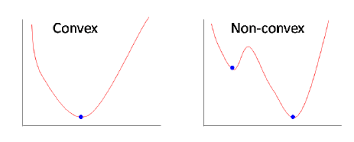